# Collaborators/Team Members: Jae Choi, Sneha Roy, Lizzie Tskhovrebadze

In [ ]:
# Import Libraries
import sqlite3
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import folium
from folium.plugins import HeatMap
from folium.plugins import MarkerCluster
from geopy.distance import great_circle
import math
from tabulate import tabulate

In [ ]:
# Import the csv files into files -> extract it

# Bus Data
file_path = '/content/MTA_Bus_Hourly_Ridership_Since_April2024.csv'
busdf = pd.read_csv(file_path)

In [ ]:
# Preview the data to make sure it's correctly imported
print(busdf.head())
print()
print("Total Rows")
len(busdf)

        transit_timestamp bus_route payment_method    fare_class_category  \
0  09/12/2024 03:00:00 PM       B16      metrocard  Metrocard - Fair Fare   
1  09/12/2024 12:00:00 AM       B26      metrocard  Metrocard - Fair Fare   
2  09/12/2024 06:00:00 PM       B37      metrocard  Metrocard - Fair Fare   
3  09/12/2024 01:00:00 AM       B44      metrocard  Metrocard - Fair Fare   
4  09/12/2024 07:00:00 AM       B62      metrocard  Metrocard - Fair Fare   

   ridership  transfers  
0     21.003      4.002  
1      3.019      0.000  
2      6.012      1.001  
3      0.000      0.000  
4     35.008      7.004  

Total Rows


968970

In [ ]:
# Subway Data
file_path = '/content/MTA_Subway_Hourly_Ridership_Since_April2024.csv'
subdf = pd.read_csv(file_path)

<ipython-input-39-34c1a2e513a3>:3: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  subdf = pd.read_csv(file_path)


In [ ]:
# Preview the data to make sure it's correctly imported
print(subdf.head())
print()
print("Total Rows")
len(subdf)

        transit_timestamp transit_mode station_complex_id  station_complex  \
0  09/13/2024 04:00:00 AM       subway                347  Saratoga Av (3)   
1  09/13/2024 11:00:00 PM       subway                339  Bergen St (2,3)   
2  09/13/2024 05:00:00 AM       subway                 35      59 St (N,R)   
3  09/13/2024 12:00:00 AM       subway                 61        50 St (D)   
4  09/13/2024 04:00:00 AM       subway                248     Avenue N (F)   

    borough payment_method    fare_class_category  ridership  transfers  \
0  Brooklyn      metrocard  Metrocard - Fair Fare          1          0   
1  Brooklyn      metrocard  Metrocard - Fair Fare         11          0   
2  Brooklyn      metrocard  Metrocard - Fair Fare         13          0   
3  Brooklyn      metrocard  Metrocard - Fair Fare          1          0   
4  Brooklyn      metrocard  Metrocard - Fair Fare          2          0   

    latitude  longitude                 Georeference  
0  40.661453  -73.91633  

1459128

In [ ]:
# Queries to extract information
# All the data is already Fair Fares -> filtered before downloaded as a csv file

# Connection
conn = sqlite3.connect(':memory:')

In [ ]:
# Load the Subway PD DF to SQLite as a table
subdf.to_sql('subdf', conn, index=False, if_exists='replace')

1459128

In [ ]:
# Load the Bus PD DF to SQLite as a table
busdf.to_sql('busdf', conn, index=False, if_exists='replace')

968970

In [ ]:
# Cursor Object
cursor = conn.cursor()

In [ ]:
# Check that Queries Works
query_practice_1 = 'SELECT * FROM busdf LIMIT 10'

cursor.execute(query_practice_1)

result_df = pd.read_sql_query(query_practice_1, conn)
print(result_df)



        transit_timestamp bus_route payment_method    fare_class_category  \
0  09/12/2024 03:00:00 PM       B16      metrocard  Metrocard - Fair Fare   
1  09/12/2024 12:00:00 AM       B26      metrocard  Metrocard - Fair Fare   
2  09/12/2024 06:00:00 PM       B37      metrocard  Metrocard - Fair Fare   
3  09/12/2024 01:00:00 AM       B44      metrocard  Metrocard - Fair Fare   
4  09/12/2024 07:00:00 AM       B62      metrocard  Metrocard - Fair Fare   
5  09/12/2024 12:00:00 PM       B20      metrocard  Metrocard - Fair Fare   
6  09/12/2024 09:00:00 PM       B47      metrocard  Metrocard - Fair Fare   
7  09/12/2024 12:00:00 PM        B8      metrocard  Metrocard - Fair Fare   
8  09/12/2024 10:00:00 PM      BX10      metrocard  Metrocard - Fair Fare   
9  09/12/2024 01:00:00 PM       B32      metrocard  Metrocard - Fair Fare   

   ridership  transfers  
0     21.003      4.002  
1      3.019      0.000  
2      6.012      1.001  
3      0.000      0.000  
4     35.008      7.00

In [ ]:
query_practice_2 = 'SELECT * FROM subdf LIMIT 10'

cursor.execute(query_practice_2)

result_df = pd.read_sql_query(query_practice_2, conn)
print(result_df)

        transit_timestamp transit_mode station_complex_id  station_complex  \
0  09/13/2024 04:00:00 AM       subway                347  Saratoga Av (3)   
1  09/13/2024 11:00:00 PM       subway                339  Bergen St (2,3)   
2  09/13/2024 05:00:00 AM       subway                 35      59 St (N,R)   
3  09/13/2024 12:00:00 AM       subway                 61        50 St (D)   
4  09/13/2024 04:00:00 AM       subway                248     Avenue N (F)   
5  09/13/2024 08:00:00 AM       subway                208  Beach 25 St (A)   
6  09/13/2024 01:00:00 AM       subway                208  Beach 25 St (A)   
7  09/13/2024 05:00:00 AM       subway                191        88 St (A)   
8  09/13/2024 07:00:00 AM       subway                111    Seneca Av (M)   
9  09/13/2024 08:00:00 AM       subway                 69        25 Av (D)   

    borough payment_method    fare_class_category  ridership  transfers  \
0  Brooklyn      metrocard  Metrocard - Fair Fare          1      

In [ ]:
# Question #1: How are Fair Fares Passengers using the transportation system?
# A. Which subway lines are they using?
# B. Which bus routes are they using?

# Check the columns for subway data
column_names = subdf.columns
print(column_names)

Index(['transit_timestamp', 'transit_mode', 'station_complex_id',
       'station_complex', 'borough', 'payment_method', 'fare_class_category',
       'ridership', 'transfers', 'latitude', 'longitude', 'Georeference'],
      dtype='object')


In [ ]:
# Check the columns for bus data
column_names = busdf.columns
print(column_names)

Index(['transit_timestamp', 'bus_route', 'payment_method',
       'fare_class_category', 'ridership', 'transfers'],
      dtype='object')


## Question 1: How are Fair Fares Passengers using the transportation system?

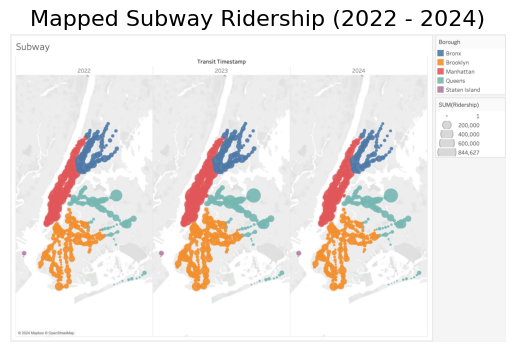

In [ ]:
# Question_1_Query_A
# Problem unresolved: no subways line in the dataset -> Create a map that shows all the subway stations mapped (based on their open data visualization)
# A. Which subway lines are they using? - plotted on Kepler.gl by using the geographic coordinates (lat/lon) from the dataset and color-coded the points to differentiate subway lines or stations by ridership
pic_path = '/content/subway_yearly.png'
img = mpimg.imread(pic_path)
plt.imshow(img)
plt.axis('off')
plt.title('Mapped Subway Ridership (2022 - 2024)', fontsize = 16)
plt.show()

Following Maps are from MTA Open Data Built-in Visualization Tools

In [ ]:
# Question_1_query_B
query = '''SELECT bus_route, COUNT(*) AS count
           FROM busdf
           GROUP BY bus_route
           ORDER BY count DESC
           LIMIT 10'''


cursor.execute(query)

result_df = pd.read_sql_query(query, conn)
print(result_df)
print(tabulate(result_df, headers = 'keys', tablefmt = 'pretty'))

  bus_route  count
0       B15   4084
1       Q10   4049
2       Q58   4047
3      M101   4031
4       M15   4021
5       Q25   4016
6       Q60   3994
7       Q66   3976
8       Q27   3969
9       Q65   3967
+---+-----------+-------+
|   | bus_route | count |
+---+-----------+-------+
| 0 |    B15    | 4084  |
| 1 |    Q10    | 4049  |
| 2 |    Q58    | 4047  |
| 3 |   M101    | 4031  |
| 4 |    M15    | 4021  |
| 5 |    Q25    | 4016  |
| 6 |    Q60    | 3994  |
| 7 |    Q66    | 3976  |
| 8 |    Q27    | 3969  |
| 9 |    Q65    | 3967  |
+---+-----------+-------+


In [ ]:
# Question #2: Where are Fair Fares Passengers entering the system?
# A. By Borough?

#Subway
query = '''SELECT borough, COUNT(*) AS count, SUM(ridership) as ridership_sum
           FROM subdf
           GROUP BY borough
           ORDER BY count DESC
           LIMIT 10'''

cursor.execute(query)

result_df = pd.read_sql_query(query, conn)
print(tabulate(result_df, headers = 'keys', tablefmt = 'pretty'))


+---+---------------+--------+---------------+
|   |    borough    | count  | ridership_sum |
+---+---------------+--------+---------------+
| 0 |   Brooklyn    | 521293 |    5392884    |
| 1 |   Manhattan   | 438577 |    8290547    |
| 2 |    Queens     | 256222 |    3175088    |
| 3 |     Bronx     | 237332 |    2530016    |
| 4 | Staten Island |  5704  |     45093     |
+---+---------------+--------+---------------+


In [ ]:
#Bus
# Problem: Region and Bus #s are together -> Data Manipulation needed

busdf['bus_prefix'] = busdf['bus_route'].str.extract(r'^([A-Z]+)')
busdf['bus_number'] = busdf['bus_route'].str.extract(r'(\d+)$')
busdf.head()

#busdf = busdf.drop('bus_route_letter', axis=1)


,transit_timestamp,bus_route,payment_method,fare_class_category,ridership,transfers,bus_prefix,bus_number
0,09/12/2024 03:00:00 PM,B16,metrocard,Metrocard - Fair Fare,21.003,4.002,B,16
1,09/12/2024 12:00:00 AM,B26,metrocard,Metrocard - Fair Fare,3.019,0.000,B,26
2,09/12/2024 06:00:00 PM,B37,metrocard,Metrocard - Fair Fare,6.012,1.001,B,37
3,09/12/2024 01:00:00 AM,B44,metrocard,Metrocard - Fair Fare,0.000,0.000,B,44
4,09/12/2024 07:00:00 AM,B62,metrocard,Metrocard - Fair Fare,35.008,7.004,B,62


In [ ]:
# Update sqlite after manipulating pandas df
cursor.execute('ALTER TABLE busdf ADD COLUMN bus_prefix TEXT')
cursor.execute('ALTER TABLE busdf ADD COLUMN bus_number TEXT') #Don't Run again if already added!
busdf.to_sql('busdf', conn, if_exists='replace', index=False)

968970

In [ ]:
query = '''SELECT DISTINCT bus_prefix
           FROM busdf'''

cursor.execute(query)

result_df = pd.read_sql_query(query, conn)
print(result_df)

   bus_prefix
0           B
1          BX
2          BM
3         BXM
4           M
5           Q
6           S
7          QM
8         SIM
9           X
10          J
11          L
12          D


In [ ]:
# Query to find
query = '''SELECT bus_prefix, COUNT(*) AS count
           FROM busdf
           GROUP BY bus_prefix
           ORDER BY count DESC
           '''

cursor.execute(query)

result_df = pd.read_sql_query(query, conn)
print(result_df)

   bus_prefix   count
0           Q  289052
1           B  202416
2          BX  154382
3           M  139569
4           S   86950
5         SIM   41152
6          QM   22818
7         BXM   14978
8           X    6725
9          BM    6477
10          L    2934
11          J    1515
12          D       2


In [ ]:
#plt.figure(figsize=(10,6))
#sns.lineplot(x='DateTime', y='Ridership', data= busdf)
#plt.title('MTA Bus Ridership Over Time')
#plt.xlabel('Date/Time')
#plt.ylabel('Ridership')
#plt.xticks(rotation=45)
#plt.show()

# Question 3:

4-year Colleges: Baruch, Hunter, CSI, Brooklyn, City, Lehman, John Jay, Queens

2-year Colleges: BMCC, QCC, BCC, KCC

In [ ]:
baruch_coord = (40.7420, -73.9876)
hunter_coord = (40.7647, -73.9633)
csi_coord = (40.5824, -74.1468)
brooklyn_coord = (40.6629, -73.9640)
city_coord = (40.8211, -73.9496)
lehman_coord = (40.8772, -73.8897)
john_jay_coord = (40.7498, -73.9901)
queens_coord = (40.7420, -73.8170)

bmcc_coord = (40.7174, -74.0123)
qcc_coord = (40.7571, -73.7563)
bcc_coord = (40.8565, -73.9127)
kcc_coord = (40.5785, -73.9356)

In [ ]:
colleges = {
    "Baruch College": (40.7404, -73.9832),
    "Hunter College": (40.7678, -73.9645),
    "College of Staten Island (CSI)": (40.6022, -74.1504),
    "Brooklyn College": (40.6309, -73.9515),
    "City College of New York (CCNY)": (40.8200, -73.9493),
    "Lehman College": (40.8729, -73.8945),
    "John Jay College": (40.7707, -73.9892),
    "Queens College": (40.7367, -73.8203),
    "BMCC": (40.7174, -74.0123),
    "QCC": (40.7571, -73.7563),
    "BCC": (40.8565, -73.9127),
    "KCC": (40.5785, -73.9356)
}

In [ ]:
subdf.head()

,transit_timestamp,transit_mode,station_complex_id,station_complex,borough,payment_method,fare_class_category,ridership,transfers,latitude,longitude,Georeference
0,09/13/2024 04:00:00 AM,subway,347,Saratoga Av (3),Brooklyn,metrocard,Metrocard - Fair Fare,1,0,40.661453,-73.91633,POINT (-73.91633 40.661453)
1,09/13/2024 11:00:00 PM,subway,339,"Bergen St (2,3)",Brooklyn,metrocard,Metrocard - Fair Fare,11,0,40.680830,-73.97510,POINT (-73.9751 40.68083)
2,09/13/2024 05:00:00 AM,subway,35,"59 St (N,R)",Brooklyn,metrocard,Metrocard - Fair Fare,13,0,40.641360,-74.01788,POINT (-74.01788 40.64136)
3,09/13/2024 12:00:00 AM,subway,61,50 St (D),Brooklyn,metrocard,Metrocard - Fair Fare,1,0,40.636260,-73.99479,POINT (-73.99479 40.63626)
4,09/13/2024 04:00:00 AM,subway,248,Avenue N (F),Brooklyn,metrocard,Metrocard - Fair Fare,2,0,40.615140,-73.97420,POINT (-73.9742 40.61514)


In [ ]:
# Logic: extract number of data rows that are a certain distance from the college locations (based on lat and long)

# Haversine Formula: calculate the absolute distance between two locations based on latitude and longitude
def haversine_formula(lat1, lon1, lat2, lon2):
  R = 6371.0 # approximate radius of earth in km

  distance_lat = math.radians(lat2 - lat1)
  distance_lon = math.radians(lon2 - lon1)

  lat1 = math.radians(lat1)
  lat2 = math.radians(lat2)

  a = math.sin(distance_lat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(distance_lon/2)**2
  c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
  d = R * c #Distance in KM

  return d #Conver to Number

In [ ]:
threshold_distance = 1

location_counts = {college: 0 for college in colleges}

coordinates = subdf[['latitude', 'longitude']].values.tolist()

for college, coord in colleges.items():
    for lat, lon in coordinates:
        distance = haversine_formula(coord[0], coord[1], lat, lon)
        if distance <= threshold_distance:
            location_counts[college] += 1

for college, count in location_counts.items():
    print(f"{college}: {count} locations")

Baruch College: 29634 locations
Hunter College: 24243 locations
College of Staten Island (CSI): 0 locations
Brooklyn College: 6662 locations
City College of New York (CCNY): 22134 locations
Lehman College: 14627 locations
John Jay College: 15368 locations
Queens College: 0 locations


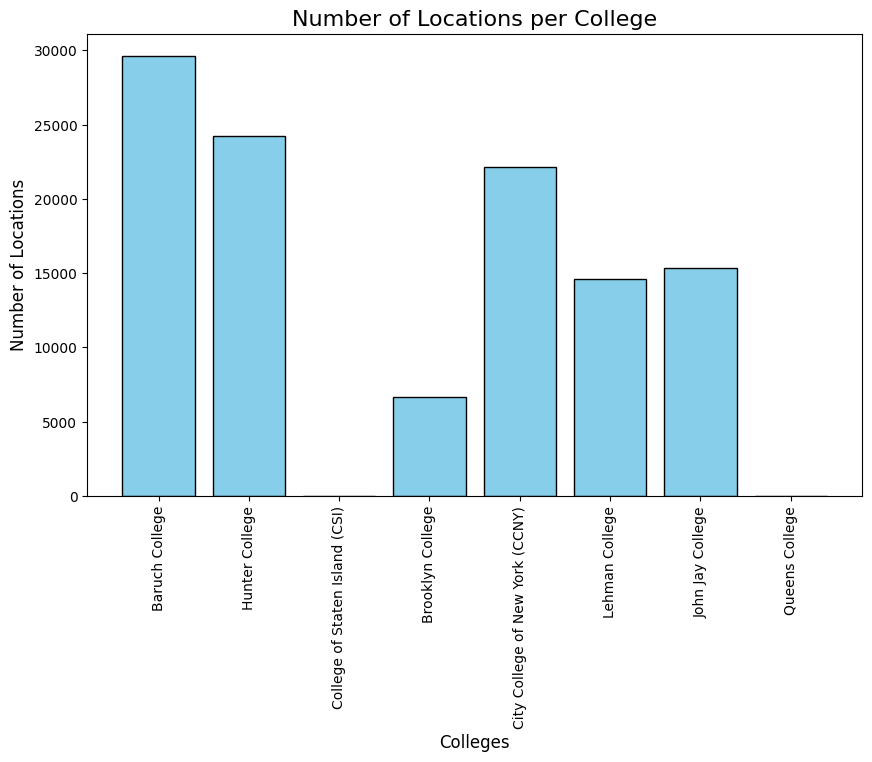

In [ ]:
colleges = list(location_counts.keys())
counts = list(location_counts.values())

# Bar Graph
plt.figure(figsize=(10,6))
plt.bar(colleges, counts, color='skyblue', edgecolor='black')
plt.title("Number of Locations per College", fontsize=16)
plt.xlabel("Colleges", fontsize=12)
plt.ylabel("Number of Locations", fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Visualization
# Create a Base Map based on NYC
m = folium.Map(location=[40.75, -73.90], zoom_start=11)

# Add the Colleges to the Map
for college, coord in location_counts.items():
    folium.Marker(location=coord, popup=college).add_to(m)

# Add the Heatmap based on counts
heat_data = []

for college, count in location_counts.items():
    college_lat, college_lon = colleges[college]
    # If there are locations within the threshold, add them to the heatmap data
    for count in range(count):  # Add the location count times
        heat_data.append([college_lat, college_lon])

HeatMap(heat_data).add_to(m)

# Display the Map
m

TypeError: Location should be a sized variable, for example a list or a tuple, instead got 29634 of type <class 'int'>.

In [ ]:
# Visualization
# Create a Base Map based on NYC
m = folium.Map(location=[40.75, -73.90], zoom_start=11)

# Add the Colleges to the Map
for college, count in location_counts.items(): # Changed from location_counts.items() to colleges.items() to iterate through the correct dictionary
    folium.Marker(location=colleges[college], popup=college).add_to(m) # Changed coord to colleges[college] to get the coordinates for each college

# Add the Heatmap based on counts
heat_data = []

for college, count in location_counts.items():
    college_lat, college_lon = colleges[college]
    # If there are locations within the threshold, add them to the heatmap data
    for _ in range(count):  # Changed count to _  as the loop variable is not used
        heat_data.append([college_lat, college_lon])

HeatMap(heat_data).add_to(m)

# Display the Map
m

TypeError: list indices must be integers or slices, not str

In [ ]:
# Question #4: What does subway and bus ridership look like for neighborhoods that would benefit from the increased eligibility criteria for Fair Fares?
# These neighborhoods have been identified as Elmhurst/Jackson Heights,Flushing, Sunset Park, Brownsville, Morrisania and Highbridge.

# Flushing -> Buses: Q12, Q13, Q16, Q17, Q19, Q20, Q25, Q27, Q28, Q34, Q48, Q50, Q58, Q65, Q66
# Subway: 7

#Brownsville -> Buses: B6, B7, B8, B12, B14, B15, B20, B25, B35, B60, B83
# Subway: 3, L, C

#Elmhurst/Jackson Heights -> Q21, Q29, Q32, Q33, Q38, Q47, Q49, Q52SBS, Q53SBS

#Sunset park-> B9, B11, B70, B37, B16, B35, B63


In [ ]:
subdf.head()

,transit_timestamp,transit_mode,station_complex_id,station_complex,borough,payment_method,fare_class_category,ridership,transfers,latitude,longitude,Georeference
0,09/13/2024 04:00:00 AM,subway,347,Saratoga Av (3),Brooklyn,metrocard,Metrocard - Fair Fare,1,0,40.661453,-73.91633,POINT (-73.91633 40.661453)
1,09/13/2024 11:00:00 PM,subway,339,"Bergen St (2,3)",Brooklyn,metrocard,Metrocard - Fair Fare,11,0,40.680830,-73.97510,POINT (-73.9751 40.68083)
2,09/13/2024 05:00:00 AM,subway,35,"59 St (N,R)",Brooklyn,metrocard,Metrocard - Fair Fare,13,0,40.641360,-74.01788,POINT (-74.01788 40.64136)
3,09/13/2024 12:00:00 AM,subway,61,50 St (D),Brooklyn,metrocard,Metrocard - Fair Fare,1,0,40.636260,-73.99479,POINT (-73.99479 40.63626)
4,09/13/2024 04:00:00 AM,subway,248,Avenue N (F),Brooklyn,metrocard,Metrocard - Fair Fare,2,0,40.615140,-73.97420,POINT (-73.9742 40.61514)


In [ ]:
# Query to find the top subway stations with most Fair Fare Usage
query = '''SELECT station_complex, borough, COUNT(*) AS count, SUM(ridership) AS ridership_sum
           FROM subdf
           GROUP BY station_complex
           ORDER BY ridership_sum DESC
           LIMIT 20
           '''

cursor.execute(query)

result_df = pd.read_sql_query(query, conn)
print(result_df)

#Elmhurst/Jackson Heights, Flushing, Sunset Park, Brownsville, Morrisania and Highbridge
# 74-Broadway (7)/Jackson Hts-Roosevelt = Jackson Heights
# 161 St-Yankee Stadium = right between Morrisania and Highbridge
# Crowns Hts-Utica Av = Brownsville
# Flushing-Main St = Flushing
# Broadway Junction = near Brownsville
# 125 St = Leads to Bronx

                                      station_complex    borough  count  \
0    Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,E)  Manhattan   4102   
1                                Flushing-Main St (7)     Queens   4050   
2                   34 St-Herald Sq (B,D,F,M,N,Q,R,W)  Manhattan   4080   
3                    14 St-Union Sq (L,N,Q,R,W,4,5,6)  Manhattan   4114   
4   74-Broadway (7)/Jackson Hts-Roosevelt Av (E,F,...     Queens   4082   
5                     Grand Central-42 St (S,4,5,6,7)  Manhattan   4046   
6                   59 St-Columbus Circle (A,B,C,D,1)  Manhattan   4037   
7                            Canal St (J,N,Q,R,W,Z,6)  Manhattan   3844   
8                         Fulton St (A,C,J,Z,2,3,4,5)  Manhattan   3991   
9        Atlantic Av-Barclays Ctr (B,D,N,Q,R,2,3,4,5)   Brooklyn   4047   
10                                     Grand St (B,D)  Manhattan   3909   
11                      161 St-Yankee Stadium (B,D,4)      Bronx   4069   
12                       

In [ ]:
query = '''SELECT station_complex, borough, COUNT(*) AS count, SUM(ridership) AS ridership_sum, SUM(ridership) / COUNT(*) AS avg_ridership
           FROM subdf
           WHERE NOT borough = 'Manhattan'
           GROUP BY station_complex
           ORDER BY ridership_sum DESC
           LIMIT 20
           '''

cursor.execute(query)

result_df = pd.read_sql_query(query, conn)
print(result_df)

                                      station_complex   borough  count  \
0                                Flushing-Main St (7)    Queens   4050   
1   74-Broadway (7)/Jackson Hts-Roosevelt Av (E,F,...    Queens   4082   
2        Atlantic Av-Barclays Ctr (B,D,N,Q,R,2,3,4,5)  Brooklyn   4047   
3                       161 St-Yankee Stadium (B,D,4)     Bronx   4069   
4                          Jay St-MetroTech (A,C,F,R)  Brooklyn   3984   
5                                   3 Av-149 St (2,5)     Bronx   3918   
6               Jamaica Center-Parsons/Archer (E,J,Z)    Queens   3988   
7                            Crown Hts-Utica Av (3,4)  Brooklyn   4053   
8                 Coney Island-Stillwell Av (D,F,N,Q)  Brooklyn   4061   
9                                     Kings Hwy (B,Q)  Brooklyn   3741   
10                                           8 Av (N)  Brooklyn   3719   
11                                  DeKalb Av (B,Q,R)  Brooklyn   3883   
12         Sutphin Blvd-Archer Av-JFK 

In [ ]:
print(tabulate(result_df, headers = 'keys', tablefmt = 'pretty'))

#Elmhurst/Jackson Heights, Flushing, Sunset Park, Brownsville, Morrisania and Highbridge
# 74-Broadway (7)/Jackson Hts-Roosevelt = Jackson Heights
# 161 St-Yankee Stadium = right between Morrisania and Highbridge
# 3 Av - 149 St = near Morrisania
# 125 St = Leads to Bronx

# Crowns Hts-Utica Av = Brownsville
# Broadway Junction = near Brownsville
# 8 Av = Sunset Park
# 36 St = Sunset Park

# Flushing-Main St = Flushing
# Forest Hills & Kew Gardens & Junction Blvd = lead to Elmhurst

+----+----------------------------------------------------+----------+-------+---------------+---------------+
|    |                  station_complex                   | borough  | count | ridership_sum | avg_ridership |
+----+----------------------------------------------------+----------+-------+---------------+---------------+
| 0  |                Flushing-Main St (7)                |  Queens  | 4050  |    348725     |      86       |
| 1  | 74-Broadway (7)/Jackson Hts-Roosevelt Av (E,F,M,R) |  Queens  | 4082  |    279564     |      68       |
| 2  |    Atlantic Av-Barclays Ctr (B,D,N,Q,R,2,3,4,5)    | Brooklyn | 4047  |    171971     |      42       |
| 3  |           161 St-Yankee Stadium (B,D,4)            |  Bronx   | 4069  |    161684     |      39       |
| 4  |             Jay St-MetroTech (A,C,F,R)             | Brooklyn | 3984  |    156412     |      39       |
| 5  |                 3 Av-149 St (2,5)                  |  Bronx   | 3918  |    138174     |      35       |
|

In [ ]:
busdf.head()

,transit_timestamp,bus_route,payment_method,fare_class_category,ridership,transfers,bus_prefix,bus_number
0,09/12/2024 03:00:00 PM,B16,metrocard,Metrocard - Fair Fare,21.003,4.002,B,16
1,09/12/2024 12:00:00 AM,B26,metrocard,Metrocard - Fair Fare,3.019,0.000,B,26
2,09/12/2024 06:00:00 PM,B37,metrocard,Metrocard - Fair Fare,6.012,1.001,B,37
3,09/12/2024 01:00:00 AM,B44,metrocard,Metrocard - Fair Fare,0.000,0.000,B,44
4,09/12/2024 07:00:00 AM,B62,metrocard,Metrocard - Fair Fare,35.008,7.004,B,62


In [ ]:
query = '''SELECT bus_route, COUNT(*) AS count, round(SUM(ridership),0) AS ridership_sum
           FROM busdf
           GROUP BY bus_route
           ORDER BY ridership_sum DESC
           LIMIT 20
           '''

cursor.execute(query)

result_df = pd.read_sql_query(query, conn)
print(result_df)

#Q25, Q27, Q44, Q58, Q65: Flushing
#B6, B8, B35: Brownsville & Sunset Park
#BX9, BX12, BX19: passes the two Bronx neighborhoods



   bus_route  count  ridership_sum
0        Q58   4047       162357.0
1         B6   3788       148775.0
2      BX12+   3356       146317.0
3        Q27   3969       137534.0
4        Q25   4016       130174.0
5       M15+   3511       122998.0
6         B1   3542       121905.0
7       Q44+   3770       120568.0
8       M101   4031       118189.0
9       BX19   3905       114908.0
10     M14D+   3843       112323.0
11       Q65   3967       111393.0
12       BX9   3763       108526.0
13       B35   3793       102949.0
14      BX36   3901       102724.0
15      S79+   3581       102637.0
16       B38   3837        99160.0
17       Q10   4049        94562.0
18       B41   3642        94266.0
19        B8   3859        93819.0


In [ ]:
subdf.head()

,transit_timestamp,transit_mode,station_complex_id,station_complex,borough,payment_method,fare_class_category,ridership,transfers,latitude,longitude,Georeference
0,09/13/2024 04:00:00 AM,subway,347,Saratoga Av (3),Brooklyn,metrocard,Metrocard - Fair Fare,1,0,40.661453,-73.91633,POINT (-73.91633 40.661453)
1,09/13/2024 11:00:00 PM,subway,339,"Bergen St (2,3)",Brooklyn,metrocard,Metrocard - Fair Fare,11,0,40.680830,-73.97510,POINT (-73.9751 40.68083)
2,09/13/2024 05:00:00 AM,subway,35,"59 St (N,R)",Brooklyn,metrocard,Metrocard - Fair Fare,13,0,40.641360,-74.01788,POINT (-74.01788 40.64136)
3,09/13/2024 12:00:00 AM,subway,61,50 St (D),Brooklyn,metrocard,Metrocard - Fair Fare,1,0,40.636260,-73.99479,POINT (-73.99479 40.63626)
4,09/13/2024 04:00:00 AM,subway,248,Avenue N (F),Brooklyn,metrocard,Metrocard - Fair Fare,2,0,40.615140,-73.97420,POINT (-73.9742 40.61514)
